In [1]:
from IPython.display import display, Image

# 한국 거래소

http://www.krx.co.kr <br/>
유가증권, 선물등의 거래시장의 개설및 관리, 유가증권상장등을 담당하는 통합거래소

* 상장종목 코드 전체
* 일자별 주가: 전체, 과거 10년치 이상
* 뉴스/공시: 공시 전체, 뉴스(과거 6개월)
* 투자자별 거래실적 (일일, 과거 10년치 이상)
* 기관외국인동향: 일자별 매수,매도

# 시가총액 순위 정보
* 시장정보 → 순위정보 → 시가총액 상/하위

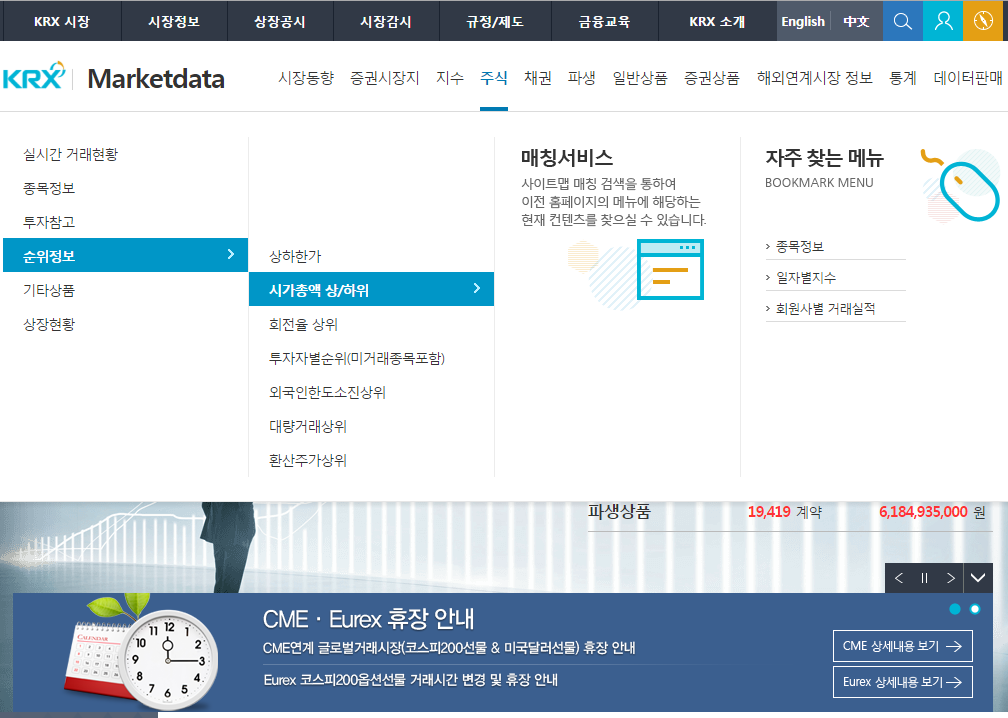

In [2]:
Image("images/marcap-page.png", width="80%")

# 시가총액 순위 정보 CSV 다운로드 

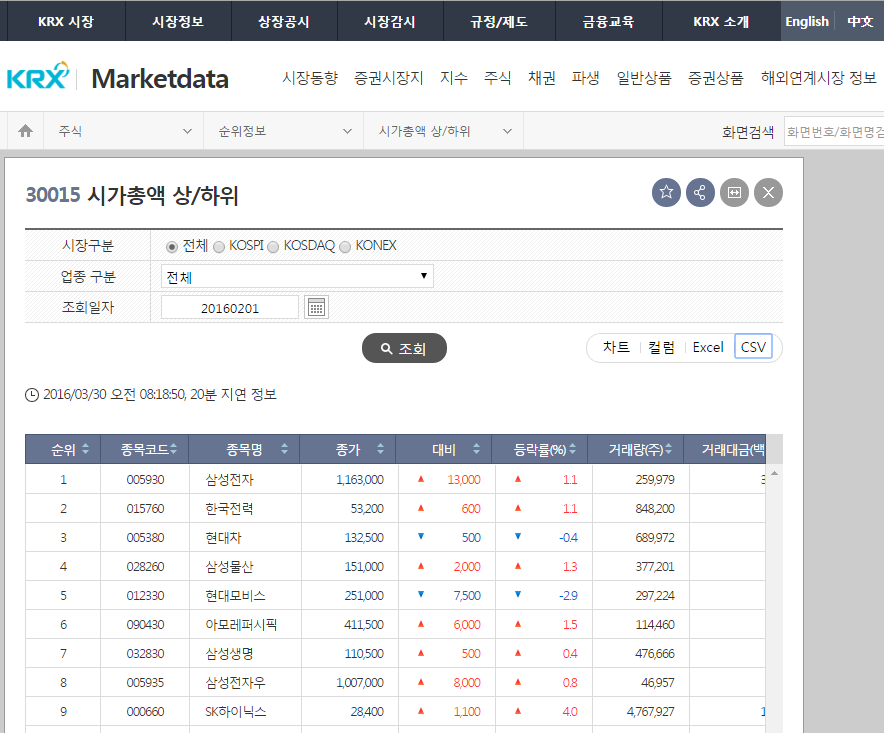

In [3]:
Image("images/marcap-30015-csv.png", width="80%")

# 트래픽 분석 (크롬 개발자 도구)
* http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx

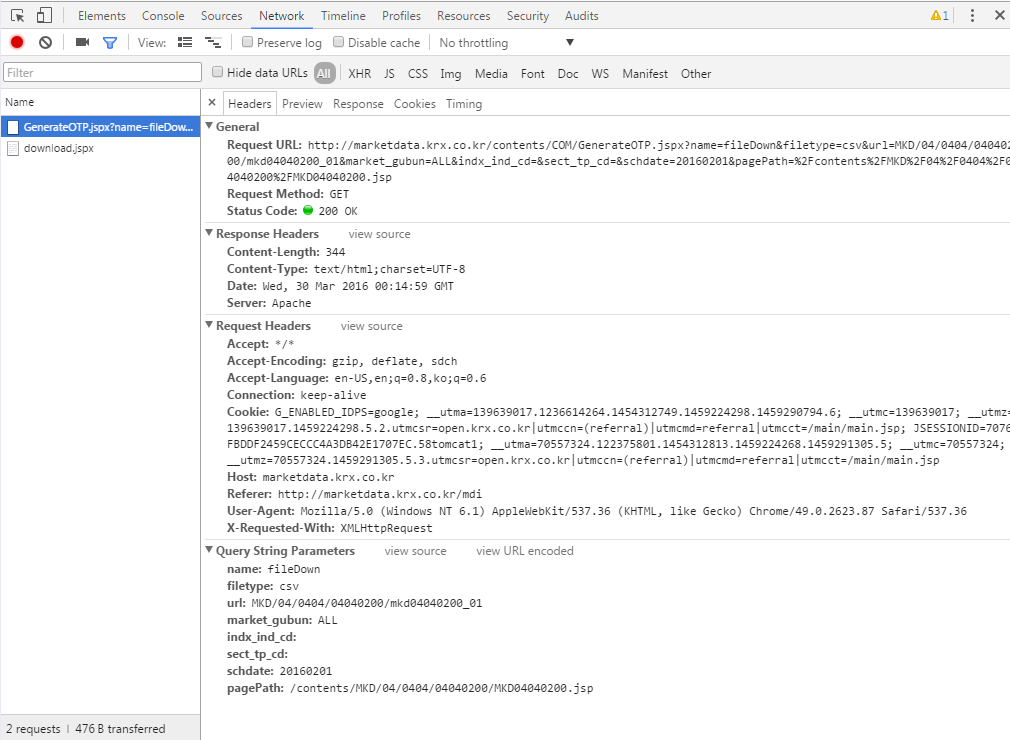

In [4]:
Image("images/csv-download-traffic-01.png")

* http://file.krx.co.kr/download.jspx

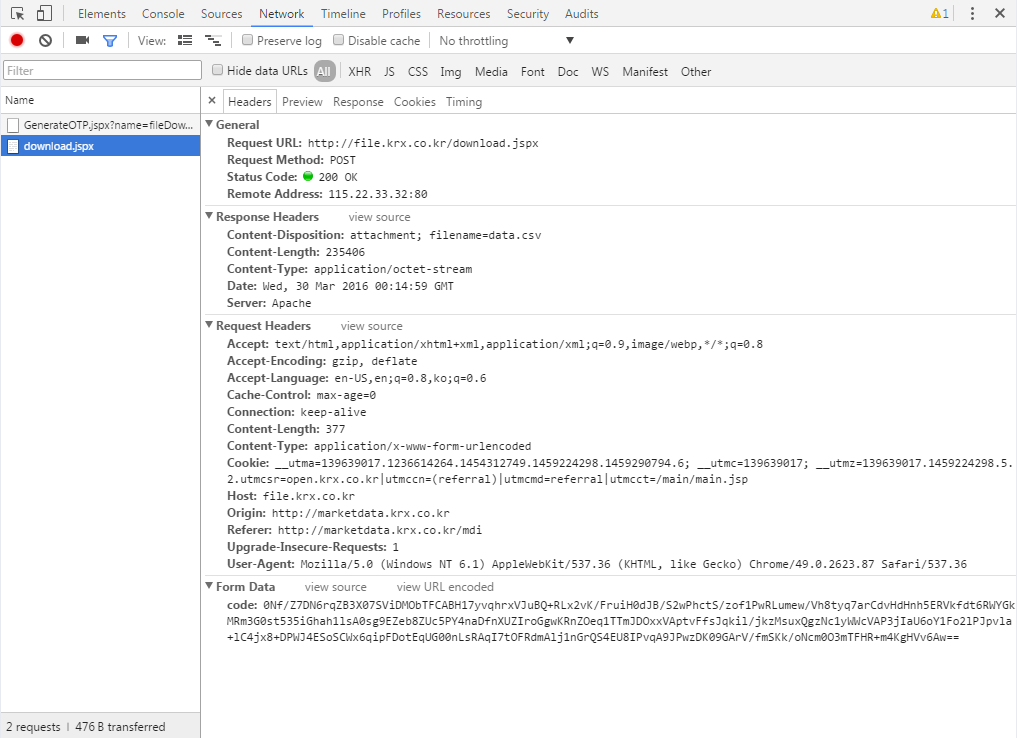

In [5]:
Image("images/csv-download-traffic-02.png")

# 트래픽 분석

## 요청응답 1/2

http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx

* name:fileDown
* filetype:csv
* url:MKD/04/0404/04040200/mkd04040200_01
* market_gubun:ALL  ('ALL':전체, 'STK': 코스피, 'KSQ': 코스피, 'KNX': 코넥스
* indx_ind_cd:5042 ('': 전체, '1001':코스피, '1028' :코스피 200 )
* sect_tp_cd:
* schdate:20160330
* pagePath:/contents/MKD/04/0404/04040200/MKD04040200.jsp
    
    
## 요청응답 2/2

http://file.krx.co.kr/download.jspx
    
* code: [GenerateOTP.jspx 에서 반환된 문자열]

# 거래소 종목 전체
* 시가총액순 전체 종목
* marcap_data.csv 로 저장

In [6]:
import requests

# STEP 01: Generate OTP
gen_otp_url = 'http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx'
gen_otp_data = {
    'name':'fileDown',
    'filetype':'csv',
    'url':'MKD/04/0404/04040200/mkd04040200_01',
    'market_gubun':'ALL', # ''ALL':전체, STK': 코스피
    'indx_ind_cd':'',  # '': 전체, ''1001':코스피, 1028' :코스피 200
    'sect_tp_cd':'',
    'schdate':'20160408',
    'pagePath':'/contents/MKD/04/0404/04040200/MKD04040200.jsp',
}
    
r = requests.post(gen_otp_url, gen_otp_data)
code = r.content

# STEP 02: download
down_url = 'http://file.krx.co.kr/download.jspx'
down_data = {
    'code': code,
}

r = requests.post(down_url, down_data)
with open("marcap_data.csv", 'wt') as f:
    f.write(r.text)

In [7]:
! head marcap_data.csv

﻿순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%),총카운트
1,005930,삼성전자,"1,246,000","-23,000","-1.8","251,868","315,017","180,756,394","12.35","145,069,337",,,2166
2,015760,한국전력,"58,700","-300","-0.5","848,786","49,813","37,683,291","2.57","641,964,077",,,
3,005380,현대차,"146,000","-500","-0.3","339,546","49,355","32,160,366","2.20","220,276,479",,,
4,028260,삼성물산,"138,500","1,500","1.1","269,187","37,070","26,272,071","1.79","189,690,043",,,
5,090430,아모레퍼시픽,"404,000","10,500","2.7","87,735","35,130","23,617,230","1.61","58,458,490",,,
6,032830,삼성생명,"117,000","30","0.0","253,626","29,444","23,400,000","1.60","200,000,000",,,
7,012330,현대모비스,"236,000","30","0.0","172,789","40,713","22,973,152","1.57","97,343,863",,,
8,005935,삼성전자우,"1,042,000","4,000","0.4","36,220","37,463","22,500,351","1.54","21,593,427",,,
9,035420,NAVER,"663,000","-12,000","-1.8","72,693","48,254","21,854,256","1.49","32,962,679",,,


In [8]:
import pandas as pd

df = pd.read_csv('marcap_data.csv')
df.head()

,﻿순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%),총카운트
0,1,005930,삼성전자,"1,246,000","-23,000",-1.8,"251,868","315,017","180,756,394",12.35,"145,069,337",NaN,NaN,2166
1,2,015760,한국전력,"58,700",-300,-0.5,"848,786","49,813","37,683,291",2.57,"641,964,077",NaN,NaN,NaN
2,3,005380,현대차,"146,000",-500,-0.3,"339,546","49,355","32,160,366",2.20,"220,276,479",NaN,NaN,NaN
3,4,028260,삼성물산,"138,500","1,500",1.1,"269,187","37,070","26,272,071",1.79,"189,690,043",NaN,NaN,NaN
4,5,090430,아모레퍼시픽,"404,000","10,500",2.7,"87,735","35,130","23,617,230",1.61,"58,458,490",NaN,NaN,NaN


In [9]:
df = pd.read_csv('marcap_data.csv', thousands=',', dtype={'종목코드':'str'}, usecols=['종목코드', '종목명'])

df.columns = ['code', 'name']
display( 'item counts: %d' % len(df) )
display( df.head() )

'item counts: 2166'

,code,name
0,005930,삼성전자
1,015760,한국전력
2,005380,현대차
3,028260,삼성물산
4,090430,아모레퍼시픽


# 종목코드, 종목명 매핑

In [10]:
df = pd.read_csv('marcap_data.csv', thousands=',', dtype={'종목코드':'str'}, usecols=['종목코드', '종목명'])
df.columns = ['code', 'name']
df.head()

,code,name
0,005930,삼성전자
1,015760,한국전력
2,005380,현대차
3,028260,삼성물산
4,090430,아모레퍼시픽


In [11]:
df_code = df.set_index('code')
df_name = df.set_index('name')

# 종목코드 → 종목명 매핑
display( df_code.ix['005930']['name'] )
display( df_code.ix['105560']['name'] )

# 종목명 → 종목코드 매핑
display( df_name.ix['삼성전자']['code']  )
display( df_name.ix['KB금융']['code']  )

'삼성전자'

'KB금융'

'005930'

'105560'